In [329]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu, kstest

In [330]:
poker_scores = pd.read_csv("wyniki_symulacji_poker.csv")
player_types = poker_scores['Typ gracza'].unique()
player_names = ['Konsektywny Gracz', 'Cierpliwy Gracz', 'Pasywny Gracz', 'Agresywny Gracz']
p_t = dict(zip(player_types,player_names))
poker_scores['Typ gracza'] = poker_scores['Typ gracza'].replace(p_t)
player_types = player_names

In [331]:
poker_scores

,Typ gracza,Pieniądze na wstępie,Lekkomyślność,Rozrzutność,Minimalna oczekiwana ręka,Wynik_pieniężny_gra_1,Wynik_pieniężny_gra_2,Wynik_pieniężny_gra_3,Wynik_pieniężny_gra_4,Wynik_pieniężny_gra_5,Wynik_pieniężny_gra_6,Wynik_pieniężny_gra_7,Wynik_pieniężny_gra_8,Wynik_pieniężny_gra_9,Wynik_pieniężny_gra_10
0,Konsektywny Gracz,500,0.1,0.1,High card,683,377,5,5,5,5,5,5,5,0
1,Konsektywny Gracz,500,0.1,0.1,High card,1375,2209,3494,3569,3619,3659,3684,3727,3802,3861
2,Konsektywny Gracz,500,0.1,0.1,High card,152,32,32,0,0,0,0,0,0,0
3,Konsektywny Gracz,500,0.1,0.1,One pair,1025,1675,3157,3406,3431,3481,3556,3556,3606,3656
4,Konsektywny Gracz,500,0.1,0.1,One pair,275,65,15,15,15,15,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,Agresywny Gracz,10000,0.9,0.9,Four-of-a-Kind,0,0,0,0,0,0,0,0,0,0
4856,Agresywny Gracz,10000,0.9,0.9,Four-of-a-Kind,960,0,0,0,0,0,0,0,0,0
4857,Agresywny Gracz,10000,0.9,0.9,Straight flush,0,0,0,0,0,0,0,0,0,0
4858,Agresywny Gracz,10000,0.9,0.9,Straight flush,0,0,0,0,0,0,0,0,0,0


In [332]:
poker_scores['zysk'] = poker_scores['Wynik_pieniężny_gra_10'] - poker_scores['Pieniądze na wstępie']

In [333]:
poker_scores["Czy_zyskuje"] = (poker_scores['zysk'] > 0)
poker_scores['zysk_%'] = poker_scores['zysk']/poker_scores['Pieniądze na wstępie']

In [334]:
df_sum = pd.DataFrame(columns=['Typ gracza', 'Średni zysk %', 'Mediana zysku %'])   

for typ in player_types:
    df_sum.loc[len(df_sum)]  = [typ, str((round(100*poker_scores[poker_scores['Typ gracza'] == typ]["zysk_%"].mean(),2)))+'%', str((round(100*(poker_scores[poker_scores['Typ gracza'] == typ]["zysk_%"]).median())))+"%"]

df_sum

,Typ gracza,Średni zysk %,Mediana zysku %
0,Konsektywny Gracz,-1.46%,-100%
1,Cierpliwy Gracz,26.3%,-92%
2,Pasywny Gracz,-7.06%,-83%
3,Agresywny Gracz,-56.21%,-100%


/var/folders/t0/sq_1cnpj20zcbxrp_r9hny540000gn/T/ipykernel_96370/3100456922.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  średnie += [round(100*poker_scores[poker_scores['Typ gracza'] == typ][poker_scores[category] == cat]["zysk_%"].mean(),2)]
/var/folders/t0/sq_1cnpj20zcbxrp_r9hny540000gn/T/ipykernel_96370/3100456922.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  średnie += [round(100*poker_scores[poker_scores['Typ gracza'] == typ][poker_scores[category] == cat]["zysk_%"].mean(),2)]
/var/folders/t0/sq_1cnpj20zcbxrp_r9hny540000gn/T/ipykernel_96370/3100456922.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  średnie += [round(100*poker_scores[poker_scores['Typ gracza'] == typ][poker_scores[category] == cat]["zysk_%"].mean(),2)]
/var/folders/t0/sq_1cnpj20zcbxrp_r9hny540000gn/T/ipykernel_96370/3100456922.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame ind

(-20.0, 160.0)

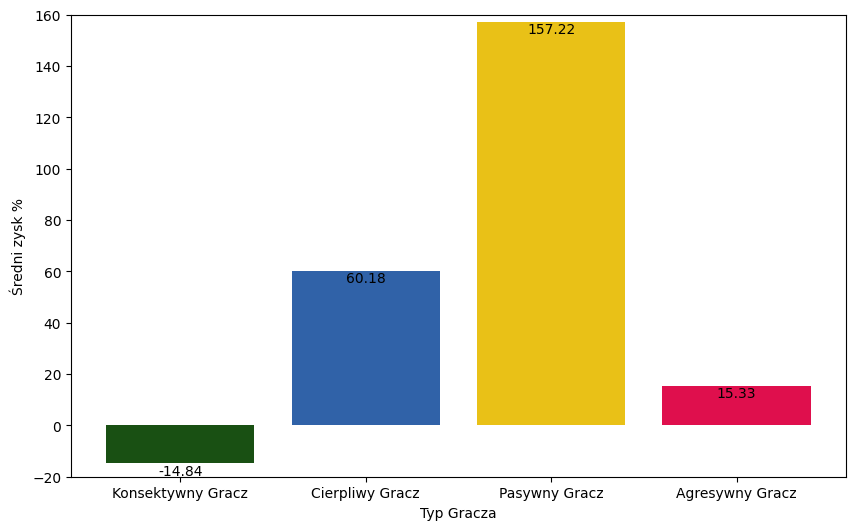

In [384]:
średnie = []
colors = ['#195013', '#3062a8','#e9c117' ,'#df0f4d']
category = 'Minimalna oczekiwana ręka'
cat =  'High card'
fig, ax = plt.subplots(figsize=(10, 6))

for typ in player_types:
    średnie += [round(100*poker_scores[poker_scores['Typ gracza'] == typ][poker_scores[category] == cat]["zysk_%"].mean(),2)]
    
ax.bar(player_types,średnie, color = colors)
    
for i, wartość in enumerate(średnie):
    ax.text(i, wartość - 4.5, str(wartość), ha='center')

ax.set_xlabel('Typ Gracza')
ax.set_ylabel('Średni zysk %')
ax.set_ylim(-20,160)

In [335]:
s , p = kstest(poker_scores['zysk_%'],'norm', args=(np.mean(poker_scores['zysk_%']), np.std(poker_scores['zysk_%'])))
print(p)

0.0


In [336]:
df_por = pd.DataFrame(columns=['Typ gracza 1', 'Typ gracza 2','wartość p' ,'Różnica istotna statystycznie'])
b = []
for typ1 in player_types:
    for typ2 in player_types:
        if typ1 != typ2 and (typ2 not in b):
            s, p = mannwhitneyu(poker_scores[poker_scores['Typ gracza'] == typ1]['zysk_%'], poker_scores[poker_scores['Typ gracza'] == typ2]['zysk_%'], alternative='two-sided')
            df_por.loc[len(df_por)] = [typ1,typ2,p,p<0.05]
    b.append(typ1)

df_por

,Typ gracza 1,Typ gracza 2,wartość p,Różnica istotna statystycznie
0,Konsektywny Gracz,Cierpliwy Gracz,1.120279e-38,True
1,Konsektywny Gracz,Pasywny Gracz,1.017130e-68,True
2,Konsektywny Gracz,Agresywny Gracz,3.163898e-14,True
3,Cierpliwy Gracz,Pasywny Gracz,1.419450e-11,True
4,Cierpliwy Gracz,Agresywny Gracz,8.245862e-96,True
5,Pasywny Gracz,Agresywny Gracz,4.511424e-146,True


In [337]:
poker_scores['zysk_%']

0      -1.000
1       6.722
2      -1.000
3       6.312
4      -1.000
        ...  
4855   -1.000
4856   -1.000
4857   -1.000
4858   -1.000
4859   -1.000
Name: zysk_%, Length: 4860, dtype: float64

/var/folders/t0/sq_1cnpj20zcbxrp_r9hny540000gn/T/ipykernel_96370/2834616088.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = poker_scores[poker_scores['Typ gracza'] == typ][poker_scores[category] == cat]['zysk_%']
/var/folders/t0/sq_1cnpj20zcbxrp_r9hny540000gn/T/ipykernel_96370/2834616088.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = poker_scores[poker_scores['Typ gracza'] == typ][poker_scores[category] == cat]['zysk_%']
/var/folders/t0/sq_1cnpj20zcbxrp_r9hny540000gn/T/ipykernel_96370/2834616088.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = poker_scores[poker_scores['Typ gracza'] == typ][poker_scores[category] == cat]['zysk_%']
/var/folders/t0/sq_1cnpj20zcbxrp_r9hny540000gn/T/ipykernel_96370/2834616088.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = poker_scores[poker_scores['Typ gracza'] == typ][poker_scores[cate

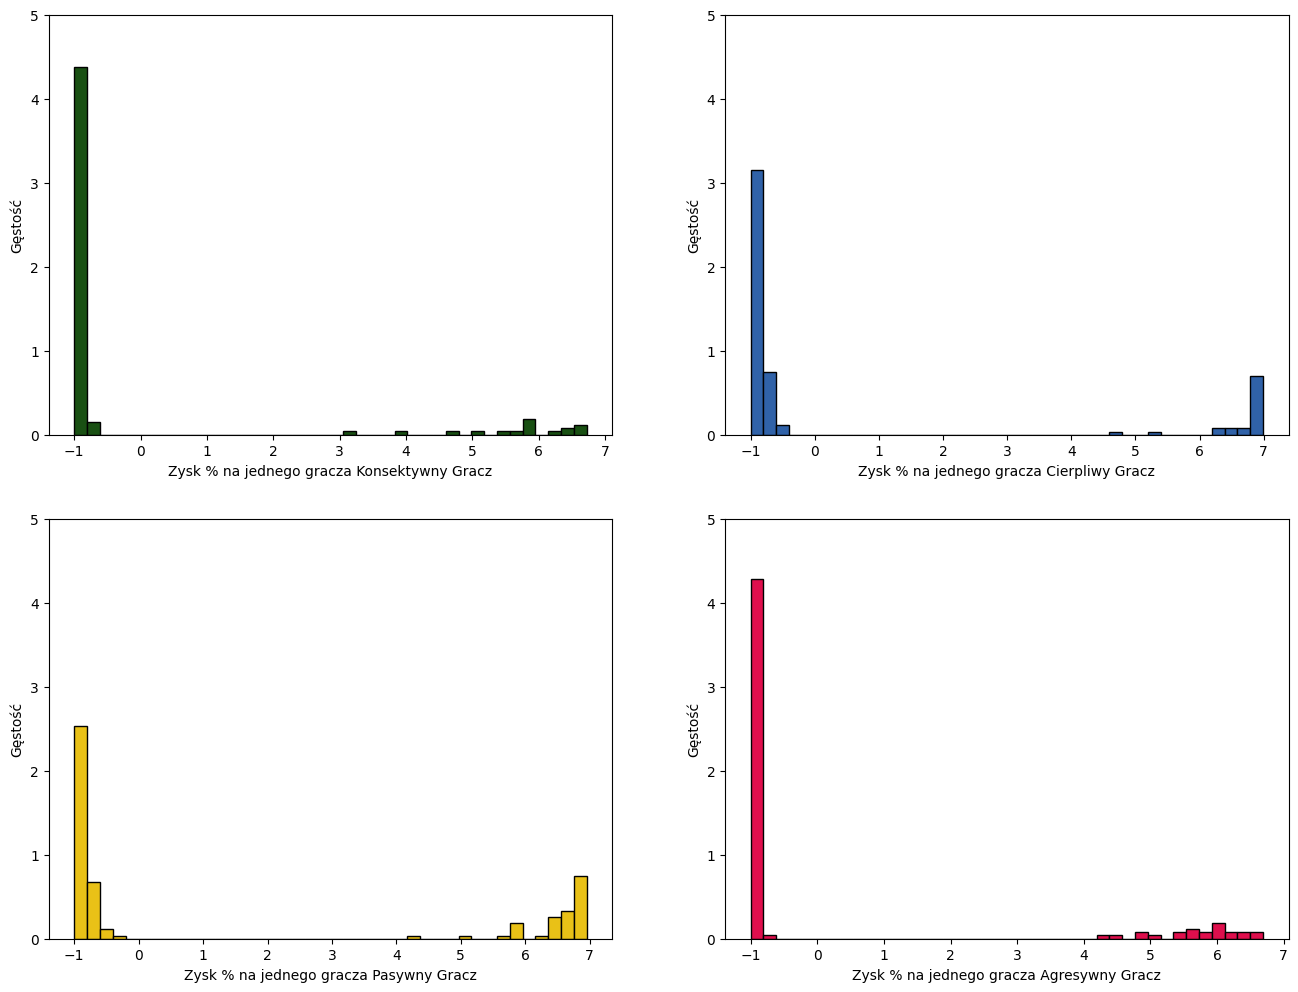

,Typ gracza,Średni zysk %,Mediana zysku %
0,Konsektywny Gracz,-14.84%,-100%
1,Cierpliwy Gracz,60.18%,-95%
2,Pasywny Gracz,157.22%,-81%
3,Agresywny Gracz,15.33%,-100%


In [358]:
fig, axs = plt.subplots(2,2, figsize=(16,12))
colors = ['#195013', '#3062a8','#e9c117' ,'#df0f4d']
category = 'Minimalna oczekiwana ręka'
cat =  'High card'
df_sum = pd.DataFrame(columns=['Typ gracza', 'Średni zysk %', 'Mediana zysku %'])   

for i, typ in enumerate(player_types):
    data = poker_scores[poker_scores['Typ gracza'] == typ][poker_scores[category] == cat]['zysk_%']
    ax = axs[i // 2, i % 2]
    ax.hist(data,bins=40, color=colors[i],edgecolor='black',density=True)
    ax.set_xlabel(f"Zysk % na jednego gracza {typ}")
    ax.set_ylim(0,5)
    # ax.set_xlim(-2,8)
    ax.set_ylabel('Gęstość')
    df_sum.loc[len(df_sum)]  = [typ, str((round(100*data.mean(),2)))+'%', str((round(100*data.median())))+"%"]
plt.show()

df_sum

In [339]:
# fig, axs = plt.subplots(2,2, figsize=(12,9))

# for i, typ in enumerate(player_types):
#     ax = axs[i // 2, i % 2]
#     ax.pie([poker_scores[poker_scores['Typ gracza'] == typ]['Czy_zyskuje'].mean(),1-poker_scores[poker_scores['Typ gracza'] == typ]['Czy_zyskuje'].mean()], autopct='%1.1f%%',colors=[colors[i],'#6e727c'])
#     # ax.pie([poker_scores['Czy_zyskuje'].mean(),1-poker_scores['Czy_zyskuje'].mean()], autopct='%1.1f%%')
#     ax.set_xlabel(f"Średnia szansa dla {typ} na zysk")


/var/folders/t0/sq_1cnpj20zcbxrp_r9hny540000gn/T/ipykernel_96370/82631342.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = poker_scores[poker_scores['Typ gracza'] == typ][poker_scores[category] == cat]['zysk_%']
/var/folders/t0/sq_1cnpj20zcbxrp_r9hny540000gn/T/ipykernel_96370/82631342.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = poker_scores[poker_scores['Typ gracza'] == typ][poker_scores[category] == cat]['zysk_%']
/var/folders/t0/sq_1cnpj20zcbxrp_r9hny540000gn/T/ipykernel_96370/82631342.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = poker_scores[poker_scores['Typ gracza'] == typ][poker_scores[category] == cat]['zysk_%']
/var/folders/t0/sq_1cnpj20zcbxrp_r9hny540000gn/T/ipykernel_96370/82631342.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = poker_scores[poker_scores['Typ gracza'] == typ][poker_scores[category

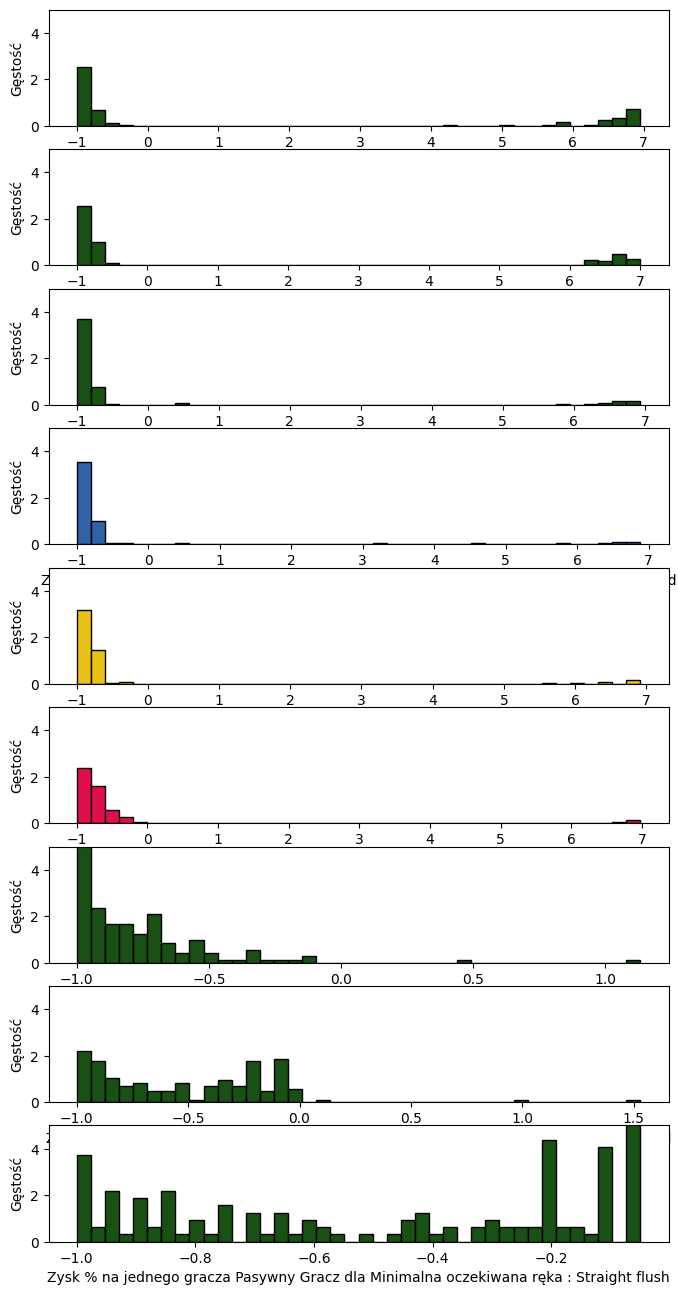

,Typ gracza,Średni zysk %,Mediana zysku %
0,Pasywny Gracz,157.22%,-81%
1,Pasywny Gracz,106.58%,-81%
2,Pasywny Gracz,-21.64%,-93%
3,Pasywny Gracz,-36.4%,-90%
4,Pasywny Gracz,-43.31%,-91%
5,Pasywny Gracz,-50.19%,-78%
6,Pasywny Gracz,-76.42%,-84%
7,Pasywny Gracz,-50.11%,-52%
8,Pasywny Gracz,-49.27%,-43%


In [361]:
fig, axs = plt.subplots(9,1, figsize=(8,16))
colors = ['#195013','#195013','#195013', '#3062a8','#e9c117' ,'#df0f4d','#195013','#195013','#195013', '#3062a8','#e9c117' ,'#df0f4d']
category = 'Minimalna oczekiwana ręka'
typ = "Pasywny Gracz" 
   
df_sum = pd.DataFrame(columns=['Typ gracza', 'Średni zysk %', 'Mediana zysku %'])   
  
   
for i, cat in enumerate([
    'High card', 'One pair', 'Two pair', 'Three-of-a-Kind',
    'Straight', 'Flush', 'Full house', 'Four-of-a-Kind', 'Straight flush'
]):    
    data = poker_scores[poker_scores['Typ gracza'] == typ][poker_scores[category] == cat]['zysk_%']
    ax = axs[i]
    ax.hist(data,bins=40, color=colors[i],edgecolor='black',density=True)
    ax.set_xlabel(f"Zysk % na jednego gracza {typ} dla {category} : {cat}")
    ax.set_ylim(0,5)
    ax.set_ylabel('Gęstość')
    df_sum.loc[len(df_sum)]  = [typ, str((round(100*data.mean(),2)))+'%', str((round(100*data.median())))+"%"]
    
plt.show()

df_sum    